# MLDL Assignment: Design a classifier using CNN
## Introduction:

In the realm of modern machine learning, Convolutional Neural Networks (CNNs) stand as a cornerstone of image classification. These networks are designed to replicate the visual recognition abilities of humans by employing specialized layers that can learn and identify intricate patterns within images. This assignment delves into the development of a classifier through the implementation of a CNN architecture.


>[MLDL Assignment: Design a classifier using CNN](#scrollTo=5d81ef2a)

>>[Introduction:](#scrollTo=5d81ef2a)

>>[Download required packages](#scrollTo=b6258419)

>>[Import packages](#scrollTo=5e414494)

>>[Normalization and One hot encoding](#scrollTo=45de482e)

>>>[One hot encoding.](#scrollTo=45de482e)

>>[Build CNN Model](#scrollTo=1d64aa5d)

>>[Compile CNN](#scrollTo=e2c54649)

>>[Training CNN](#scrollTo=a2438720)

>>[Evaluation](#scrollTo=674ebaa1)

>>[Conclusion:](#scrollTo=2a183431)



## Import packages

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPool2D,
    Dense,
    Flatten,
    Dropout,
    Conv2D,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Normalization and One hot encoding

Since our data is ready we now need to normalize the data, since normalizing the images in deep learning will produce very good results. Normalizing means we are bringing all the values in the data into a common scale 0-1. This will make out model converge fast and also we will not have any distrotions in the data.

For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.

### One hot encoding.
CIFAR 10 has 10 categories, in general we should label the categorical data using the one hot encoding.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape of x_train is {}".format(x_train.shape))
print("Shape of x_test is {}".format(x_test.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of y_test is {}".format(y_test.shape))
# Normalizing
x_train = x_train / 255
x_test = x_test / 255

# One hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


##  Build CNN Model

Lets try to train a basic deep learning model. Any deep learning model that needs to classify images use Convolution neural network (CNN). CNN's are proven very effective on image data, also if we have enough data, we can make a deep neural network with multiple CNN layers arranged in specific design to create state of the art results.


I will start with two basic CNN layers, where each layer is attached to a maxpool layer. Max pooling is a great way to reduce the size of parameters without losing much information. As usual in any deep learning model, I need to flatten the intermediate layer results and pass them to a Dense network. Then the dense network result will be passed to a final output layer where the number of units represents the number of categories in the data, which is 10 in our case. Softmax is chosen as the final activation because we need the highest probable class out of 10.


Finally compile your model using adam optimizer.

Let us try to Sequentially build our models.


In [3]:
model = Sequential()
model.add(
    Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        padding="same",
        input_shape=(32, 32, 3),
    )
)
model.add(BatchNormalization())
model.add(
    Conv2D(
        32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"
    )
)
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(
    Conv2D(
        64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"
    )
)
model.add(BatchNormalization())
model.add(
    Conv2D(
        64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"
    )
)
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(
    Conv2D(
        128, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"
    )
)
model.add(BatchNormalization())
model.add(
    Conv2D(
        128, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"
    )
)
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

## Compile CNN

In [4]:
# compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

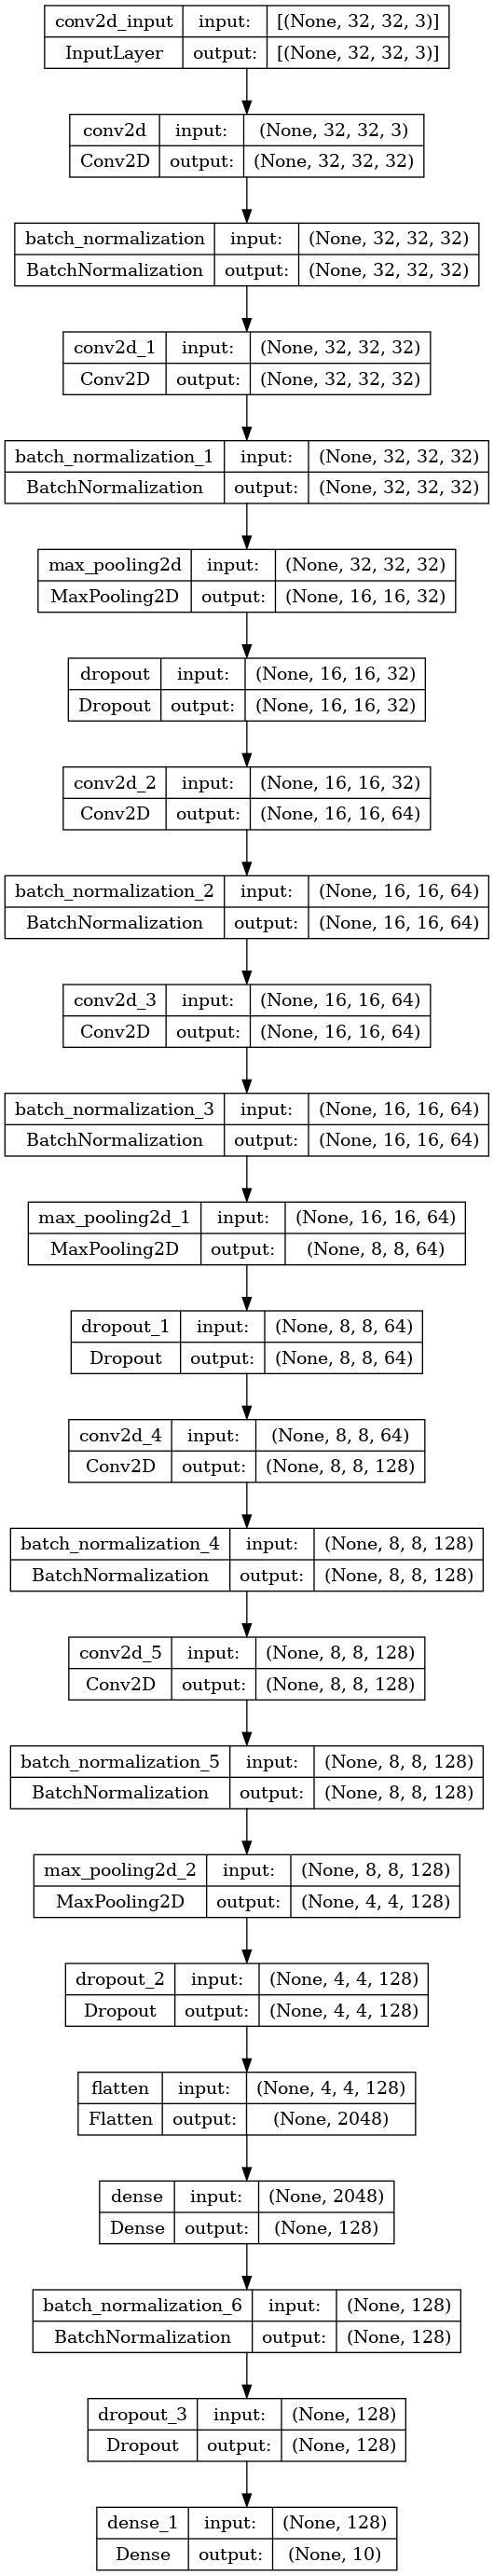

In [5]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=False,
)

In [6]:
# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
)

it_train = datagen.flow(x_train, y_train_cat)

steps = int(x_train.shape[0] / 64)
num_epochs = 200

## Training CNN

In [7]:
# Fit the model on the batches generated by datagen.flow().
history = model.fit(
    it_train,
    epochs=num_epochs,
    steps_per_epoch=steps,
    validation_data=(x_test, y_test_cat),
    verbose=2,
)

Epoch 1/200


2023-08-17 13:59:38.315391: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


781/781 - 31s - loss: 2.0085 - accuracy: 0.3215 - val_loss: 1.4300 - val_accuracy: 0.4833 - 31s/epoch - 40ms/step
Epoch 2/200
781/781 - 18s - loss: 1.5154 - accuracy: 0.4527 - val_loss: 1.2820 - val_accuracy: 0.5439 - 18s/epoch - 23ms/step
Epoch 3/200
781/781 - 19s - loss: 1.3728 - accuracy: 0.5029 - val_loss: 1.2241 - val_accuracy: 0.5710 - 19s/epoch - 24ms/step
Epoch 4/200
781/781 - 19s - loss: 1.2819 - accuracy: 0.5436 - val_loss: 1.2127 - val_accuracy: 0.5729 - 19s/epoch - 24ms/step
Epoch 5/200
781/781 - 18s - loss: 1.2246 - accuracy: 0.5671 - val_loss: 1.1074 - val_accuracy: 0.6051 - 18s/epoch - 23ms/step
Epoch 6/200
781/781 - 19s - loss: 1.1618 - accuracy: 0.5908 - val_loss: 0.9671 - val_accuracy: 0.6624 - 19s/epoch - 24ms/step
Epoch 7/200
781/781 - 18s - loss: 1.1089 - accuracy: 0.6082 - val_loss: 1.0035 - val_accuracy: 0.6519 - 18s/epoch - 23ms/step
Epoch 8/200
781/781 - 18s - loss: 1.0683 - accuracy: 0.6294 - val_loss: 0.8618 - val_accuracy: 0.7019 - 18s/epoch - 23ms/step
Epoc

## Evaluation

In [8]:
evaluation_t = model.evaluate(it_train)
print(f"[Info] Train Accuracy: {evaluation_t[1]}")

1563/1563 [==============================] - 31s 20ms/step - loss: 0.3601 - accuracy: 0.8741
[Info] Train Accuracy: 0.8741199970245361


In [9]:
evaluation = model.evaluate(x_test, y_test_cat)
print(f"[Info] Test Accuracy: {evaluation[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.4877 - accuracy: 0.8378
[Info] Test Accuracy: 0.8378000259399414


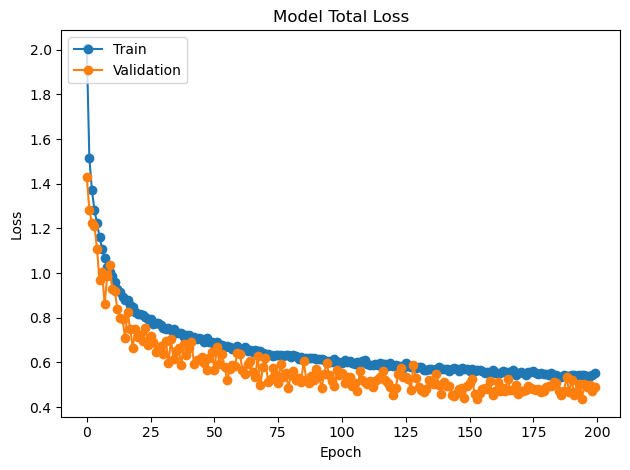

In [10]:
try:
    plt.plot(history.history['loss'], marker='o')
    plt.plot(history.history['val_loss'], marker='o')
    plt.title('Model Total Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Adjust the rotation angle of x-axis tick labels
    plt.xticks(rotation=0)  # Set rotation angle to 0 degrees

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
except Exception as e:
    print(e)


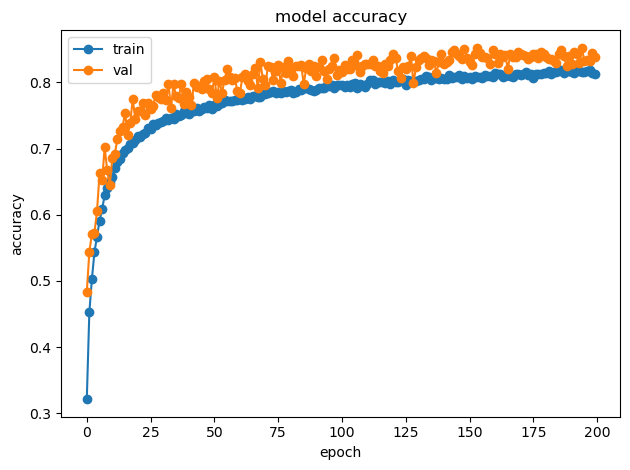

In [11]:
try:
    plt.plot(history.history['accuracy'], marker='o',)
    plt.plot(history.history['val_accuracy'], marker='o',)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    # Adjust the rotation angle of x-axis tick labels
    plt.xticks(rotation=0)  # Set rotation angle to 0 degrees

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
except Exception as e:
    print(e)

313/313 [==============================] - 1s 2ms/step


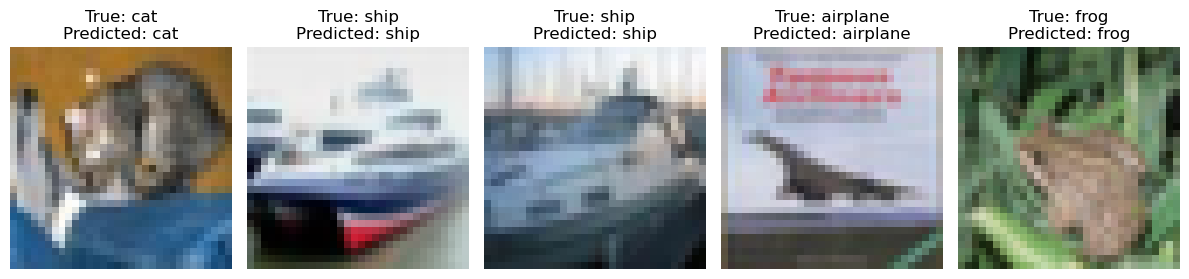

In [12]:
def plot_input_vs_predictions(model: tf.keras.models.Model,
                              x_test: np.ndarray,
                              y_test: np.ndarray,
                              class_names: list,
                              num_samples=5):
    num_classes = len(class_names)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[i])
        true_label = np.argmax(y_test[i])
        predicted_label = y_pred_classes[i]
        plt.title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

try:
    # Plot input images vs. predictions
    plot_input_vs_predictions(model, x_test, y_test_cat, class_names=cifar10_class_names, num_samples=5)
except Exception as e:
    print(e)

In [13]:
def render_and_save_examples(model, example_data, true_labels, class_names, image_size):
    examples_number = example_data.shape[0]
    video_output_path = 'output_video.mp4'
    codec = cv2.VideoWriter_fourcc(*'mp4v')
    vid_width_height = 1280, 720
    vw = cv2.VideoWriter(video_output_path, codec, 30, vid_width_height)

    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3
    thickness = 2

    for i in range(examples_number):
        image = example_data[i]
        image_disp = cv2.resize(image * 255, (720, 720))

        true_label = true_labels[i][0]

        # Generate predictions using the model
        predictions = model.predict(np.expand_dims(example_data[i], axis=0), verbose=0)
        predicted_label = np.argmax(predictions)

        predicted_score = predictions[0]
        top_classes = np.argsort(predicted_score)[::-1]

        title = f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}"

        img = np.zeros((720, 1280, 3), dtype=np.uint8)
        img[:720, :720, :] = image_disp

        x, y = 740, 60
        is_correct = true_label == predicted_label
        txt_color = (100, 255, 0) if is_correct else (0, 0, 255)
        cv2.putText(img, text=title, org=(x, y), fontScale=font_scale, fontFace=font_face,
                    thickness=thickness, color=txt_color, lineType=cv2.LINE_AA)

        bar_x, bar_y = 740, 130
        for j, class_index in enumerate(top_classes):
            if j < 10:
                p = predicted_score[class_index] * 100
                rect_width = int(p * 3.3)
                rect_start = 180
                color = (255, 218, 158) if class_index == true_label else (100, 100, 100)
                cv2.rectangle(img, (bar_x + rect_start, bar_y - 5), (bar_x + rect_start + rect_width, bar_y - 20),
                              color, -1)
                text = f'{class_names[class_index]}: {int(p)}%'
                cv2.putText(img, text=text, org=(bar_x, bar_y), fontScale=font_scale, fontFace=font_face,
                            thickness=thickness, color=color, lineType=cv2.LINE_AA)
                bar_y += 60
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        vw.write(img) if true_label == predicted_label else None

    vw.release()

try:
    # Select random 60 indices
    random_indices = np.random.choice(len(x_test), size=60, replace=False)
    selected_x_test = x_test[random_indices]
    selected_y_test = y_test[random_indices]

    # Use the function with your data and model
    render_and_save_examples(model, selected_x_test, selected_y_test, cifar10_class_names,  32)
except Exception as e:
    print(e)

In [14]:
# @title
from IPython.display import HTML
from base64 import b64encode

video_path = 'output_video.mp4'

def show_video(video_path, video_width = 600):
    video_file = open(video_path, "r+b").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video(video_path)

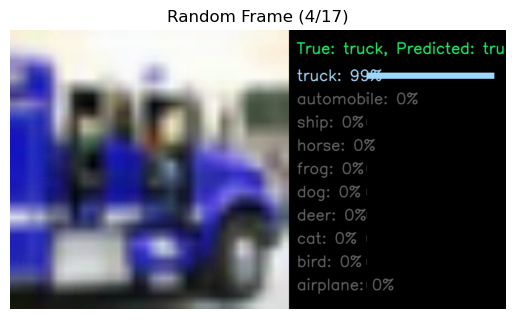

In [15]:
try:
    # Open the video file
    video_path = './output_video.mp4'
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Select a random frame index
    random_frame_index = np.random.randint(0, total_frames)

    # Set the frame index
    cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_index)

    # Read the selected frame
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        print("Error reading frame from the video.")
        cap.release()
    else:
        # Convert BGR to RGB for matplotlib display
        frame_rgb = frame

        # Plot the frame
        plt.imshow(frame_rgb)
        plt.title(f"Random Frame ({random_frame_index}/{total_frames})")
        plt.axis('off')
        plt.show()

    # Release the video capture object
    cap.release()
except Exception as e:
    print(e)

In [16]:
try:
    model.save('cifar10-model.h5')
except Exception as e:
    print(e)

## Conclusion:

In culmination, the designed CNN classifier has yielded promising results. Achieving an accuracy rate of 88% demonstrates the potency of CNNs in discerning patterns within images. However, this is just the beginning of the exploration. Leveraging pre-trained models and employing more complex architectures offer avenues for refinement. The augmentation of data and the optimization of parameters like batch size and learning rate can further enhance performance. With ample computational resources and the spirit of experimentation, the potential to unravel greater accuracy and capabilities within the classifier remains a tantalizing prospect.